In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

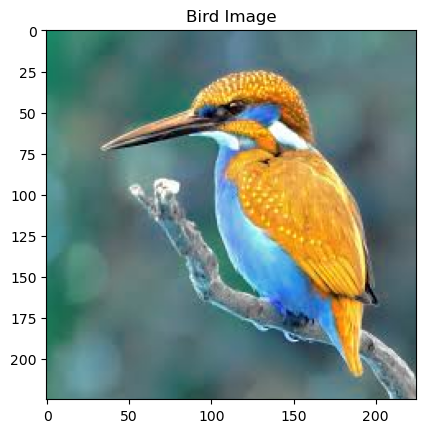

In [13]:
# Load and resize the image
image = cv2.imread('images.jpg')
scale_percent = 50  # scaling percentage
dim = (int(image.shape[1] * scale_percent / 100), int(image.shape[0] * scale_percent / 100))
resized = cv2.resize(image, dim)
plt.imshow(image)
plt.title('Bird Image')
plt.show()

In [14]:
# Create mask and models for GrabCut
mask = np.zeros(resized.shape[:2], np.uint8)
bgd_model, fgd_model = np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)

In [15]:
#Define ROI and apply GrabCut
rect = (20, 10, resized.shape[1] - 20, resized.shape[0] - 20)
cv2.grabCut(resized, mask, rect, bgd_model, fgd_model, 1, cv2.GC_INIT_WITH_RECT)
segmented = resized * np.where((mask == 2) | (mask == 0), 0, 1)[:, :, np.newaxis]

In [16]:
# Convert segmented image to uint8 for displaying
segmented = segmented.astype('uint8')

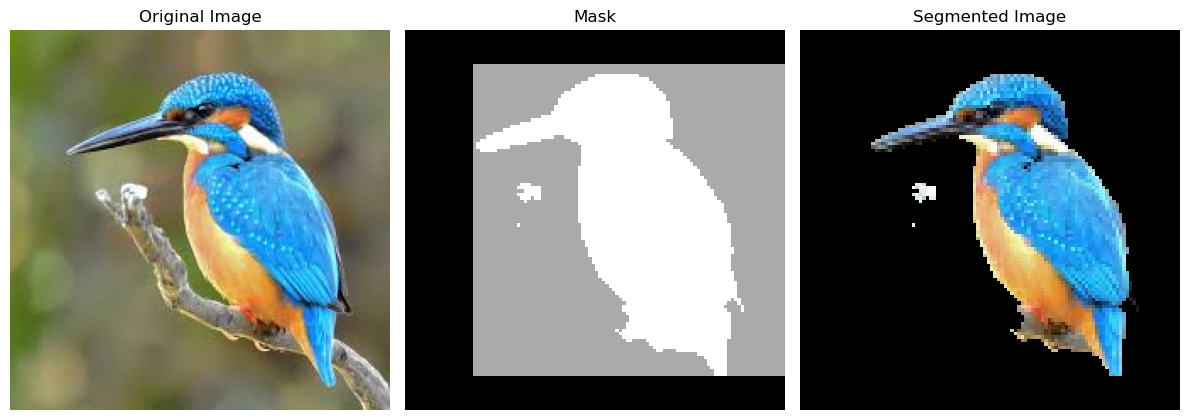

In [17]:
# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image"); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)); plt.title("Segmented Image"); plt.axis('off')

plt.subplot(1, 3, 2); plt.imshow(mask, cmap='gray'); plt.title("Mask"); plt.axis('off')
plt.tight_layout()
plt.show()
